# Data 

Cogumelos - https://www.kaggle.com/datasets/uciml/mushroom-classification
Neste dataset podemos observar cogumelos que são venenosos ou seguros para comer.

Filmes - https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset
Dataset com filmes e as classificações tais como: género, rating e atores

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np



column_names = [
    "class",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat",
]

# Lê dados do dataset
mushroom_data = pd.read_csv("./input/mushrooms.csv", header=None, names=column_names)

# Encode categorical features
le = LabelEncoder()
for column in mushroom_data.columns:
    mushroom_data[column] = le.fit_transform(mushroom_data[column])

# Separar os dados em features (X) e objetivo (y)
X = mushroom_data.drop("class", axis=1)
y = mushroom_data["class"]

# Dividir os dados em dataset de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# K-means

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=4, random_state=42) # amostragem
X_train_clustered = kmeans.fit_predict(X_train)

# Usa K-Means para testar o conjunto 
X_test_clustered = kmeans.predict(X_test)

# Avalia K-Means clusters
kmeans_accuracy = accuracy_score(y_test, X_test_clustered)
kmeans_conf_matrix = confusion_matrix(y_test, X_test_clustered)

# Apresenta resultados K-Means clustering
print("\nK-Means Clustering Results:")
print("Accuracy:", kmeans_accuracy)
print("Confusion Matrix:\n", kmeans_conf_matrix)


K-Means Clustering Results:
Accuracy: 0.35938461538461536
Confusion Matrix:
 [[  0   0   0   0]
 [ 31 450 377   0]
 [325  71 134 237]
 [  0   0   0   0]]


c:\Users\Tiago\Desktop\IA-02\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
# Visualization

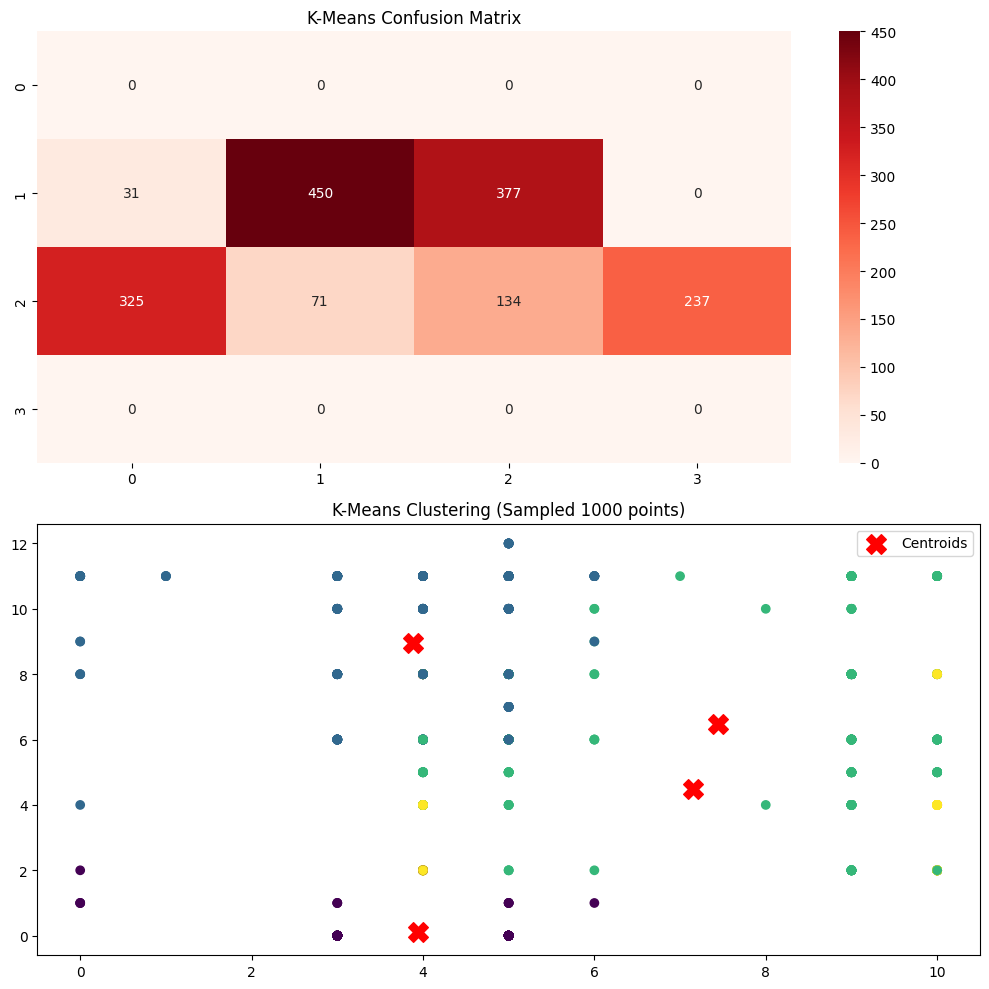

In [14]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10,10 ))
import seaborn as sns


# K-Means Matriz Confusão
sns.heatmap(
    confusion_matrix(y_test, X_test_clustered),
    annot=True,
    fmt="d",
    cmap="Reds",
    ax=axes[0],
)
axes[0].set_title("K-Means Confusion Matrix")

# Scatter plot for K-Means Clusters (utilizando as 2 primeiras features(X)) com uma amostragem de "sample_size"
sample_size = 1000

sample_indices = np.random.choice(X_test.shape[0], sample_size, replace=False)
axes[1].scatter(
    X_test.iloc[sample_indices, 2],
    X_test.iloc[sample_indices, 8],
    c=X_test_clustered[sample_indices],
    cmap="viridis",
)
axes[1].scatter(
    kmeans.cluster_centers_[:, 2],
    kmeans.cluster_centers_[:, 8],
    marker="X",
    s=200,
    c="red",
    label="Centroids",
)
axes[1].set_title(f"K-Means Clustering (Sampled {sample_size} points)")
axes[1].legend()

plt.tight_layout()

# Data set Movies -- Association

# Tratar os dados

In [17]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import random

# Path para os dados do dataset - MovieLens Small Latest Dataset (https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset)
movies_path = './movies_input/movies.csv'
ratings_path = './movies_input/ratings.csv'

# Lê os dados
movies = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)
# Junta os ratings com os filmes
data = pd.merge(ratings, movies, on='movieId')

# Filtra os filmes com um rating superior ou igual a "threshold"
threshold = 4
data = data[data['rating'] >= threshold]


# Definir uma semente para reprodutibilidade
random.seed(42) 

#  Filtragens   

In [19]:
# Amostragem de utilizadores aleatória
user_subset = random.sample(data['userId'].unique().tolist(), k=min(1000, len(data['userId'].unique()))) # 1000 - sub conjunto de dados a utilizar
data_subset = data[data['userId'].isin(user_subset)]

# Amostragem de filmes aleatória
movie_subset = random.sample(data_subset['movieId'].unique().tolist(), k=min(100, len(data_subset['movieId'].unique()))) # 100 - sub conjunto de dados a utilizar
data_subset = data_subset[data_subset['movieId'].isin(movie_subset)]

# Agregar ratings de entradas duplicadas
data_subset = data_subset.groupby(['userId', 'title'])['rating'].max().reset_index()

# Cria uma matriz de preferência utilizador-filme
user_movie_matrix = data_subset.pivot(index='userId', columns='title', values='rating').fillna(0)

# Converter ratings para valores binários
basket_sets = user_movie_matrix.applymap(lambda x: 1 if x >= threshold else 0)


C:\Users\Tiago\AppData\Local\Temp\ipykernel_21036\826318899.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = user_movie_matrix.applymap(lambda x: 1 if x >= threshold else 0)
c:\Users\Tiago\Desktop\IA-02\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Gerar conjuntos e regras

In [ ]:

# Gerar conjuntos frequentes usando o algoritmo Apriori
min_support = 0.01 # apenas conjuntos com suporte superior a 1% são considerados
frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)

# Gerar regras de associação
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5) # min_threshold = 0.5 - apenas regras com confiança >= 50% são consideradas 

# Apresentação

In [20]:

# Apresenta as regras
if not rules.empty:
    for index, rule in rules.iterrows():
        antecedent_movies = rule['antecedents']
        consequent_movies = rule['consequents']

        print(f"Rule {index + 1}:")
        print(f"  If the user likes movies: {', '.join(antecedent_movies)}")
        print(f"  Then the user might also like movies: {', '.join(consequent_movies)}")
        print(f"  Confidence: {rule['confidence']:.2f}")
        print(f"  Lift: {rule['lift']:.2f}")
        print("-" * 50)
else:
    print("Not able to identify any rule.")

Rule 1:
  If the user likes movies: Igby Goes Down (2002)
  Then the user might also like movies: Adaptation (2002)
  Confidence: 0.75
  Lift: 7.79
--------------------------------------------------
Rule 2:
  If the user likes movies: Aviator, The (2004)
  Then the user might also like movies: Finding Nemo (2003)
  Confidence: 0.63
  Lift: 2.14
--------------------------------------------------
Rule 3:
  If the user likes movies: Igby Goes Down (2002)
  Then the user might also like movies: Chinatown (1974)
  Confidence: 0.50
  Lift: 3.50
--------------------------------------------------
Rule 4:
  If the user likes movies: Nobody's Fool (1994)
  Then the user might also like movies: Die Hard: With a Vengeance (1995)
  Confidence: 0.50
  Lift: 2.44
--------------------------------------------------
Rule 5:
  If the user likes movies: I Love You, Man (2009)
  Then the user might also like movies: Fifth Element, The (1997)
  Confidence: 0.62
  Lift: 2.92
---------------------------------